In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

In [64]:
df = pd.read_csv('AMTD.csv')

In [65]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-01-02,5.73,5.98,5.58,5.94,3.691822,4234400
1,2003-01-03,5.85,6.10,5.84,6.10,3.791265,2589000
2,2003-01-06,6.03,6.15,5.91,6.08,3.778834,3699800
3,2003-01-07,6.06,6.07,5.93,5.98,3.716682,3124600
4,2003-01-08,5.86,5.92,5.73,5.76,3.579948,2673700


In [66]:
len(df)

1378

In [67]:
cols_to_use_corr = list(df.columns)
cols_to_use_corr.pop(0)
df[cols_to_use_corr].corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998756,0.998630,0.997476,0.935264,0.156091
High,0.998756,1.000000,0.998443,0.998934,0.937225,0.171217
Low,0.998630,0.998443,1.000000,0.998669,0.934665,0.144485
Close,0.997476,0.998934,0.998669,1.000000,0.936640,0.161272
Adj Close,0.935264,0.937225,0.934665,0.936640,1.000000,0.175904
Volume,0.156091,0.171217,0.144485,0.161272,0.175904,1.000000


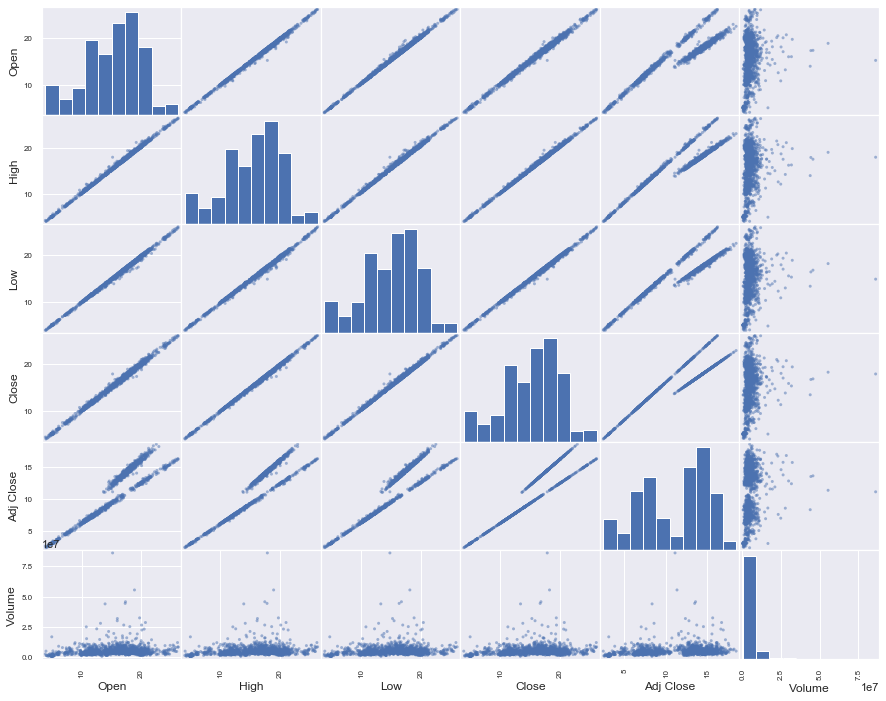

In [68]:
pd.plotting.scatter_matrix(df[cols_to_use_corr],figsize=(15,12));

In [69]:
df['Day'] = df['Date'].apply(lambda x: x.split('-')[-1])
df['Year'] = df['Date'].apply(lambda x: x.split('-')[0])
df['Month'] = df['Date'].apply(lambda x: x.split('-')[1])

In [70]:
df.rename(columns={'Open' : 'Open Price','Close' : 'Close Price'},inplace=True)

In [71]:
df.head()

,Date,Open Price,High,Low,Close Price,Adj Close,Volume,Day,Year,Month
0,2003-01-02,5.73,5.98,5.58,5.94,3.691822,4234400,02,2003,01
1,2003-01-03,5.85,6.10,5.84,6.10,3.791265,2589000,03,2003,01
2,2003-01-06,6.03,6.15,5.91,6.08,3.778834,3699800,06,2003,01
3,2003-01-07,6.06,6.07,5.93,5.98,3.716682,3124600,07,2003,01
4,2003-01-08,5.86,5.92,5.73,5.76,3.579948,2673700,08,2003,01


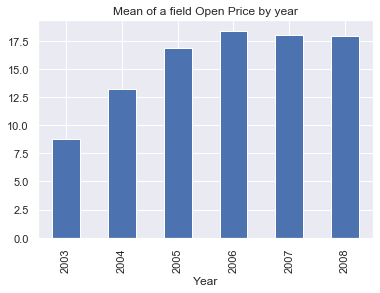

In [72]:
df.groupby('Year')['Open Price'].mean().plot.bar()
plt.title('Mean of a field Open Price by year');

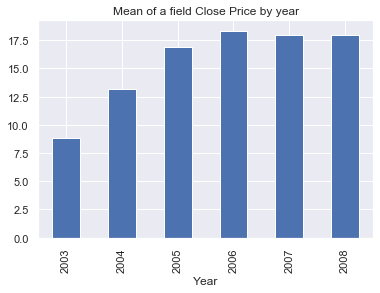

In [73]:
df.groupby('Year')['Close Price'].mean().plot.bar()
plt.title('Mean of a field Close Price by year');

In [74]:
import calendar

In [75]:
def show_chart(df,col='Open Price',year='2008',month=['01','02','03'],margin=5,figsize=(15,12)):
    to_plot = df[(df['Year']==year) & (df['Month'].isin(month))]
    colors = ['r','g','b','y','gray']
    colors = colors[:len(month)]
    to_use_colors = []
    ranges = []
    counter = 0
    start_month = 0
    length_monthes = []
    for c,i in zip(colors,month):
        len_month = len(to_plot[to_plot['Month']==i])
        length_monthes.append(len_month)
        if counter!=0:
            start_month+=len_month+margin
        to_use_colors.extend([c for i in range(len_month)])
        ranges.extend(list(range(start_month,start_month+len_month)))
        counter+=1
    y = to_plot['Day'].values
    x = to_plot[col].values
    plt.figure(figsize=figsize)
    plt.title('Chart for field {0} for {1} year'.format(col,year))
    plt.bar(ranges,x,color=to_use_colors)
    month_names = [calendar.month_name[int(i[1])] if i[0]=='0' else calendar.month_name[int(i)] for i in month]
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
    plt.legend(handles,month_names)
    plt.xticks(ranges,y,rotation=90)
    plt.xlabel('Days')
    plt.ylabel('Values')

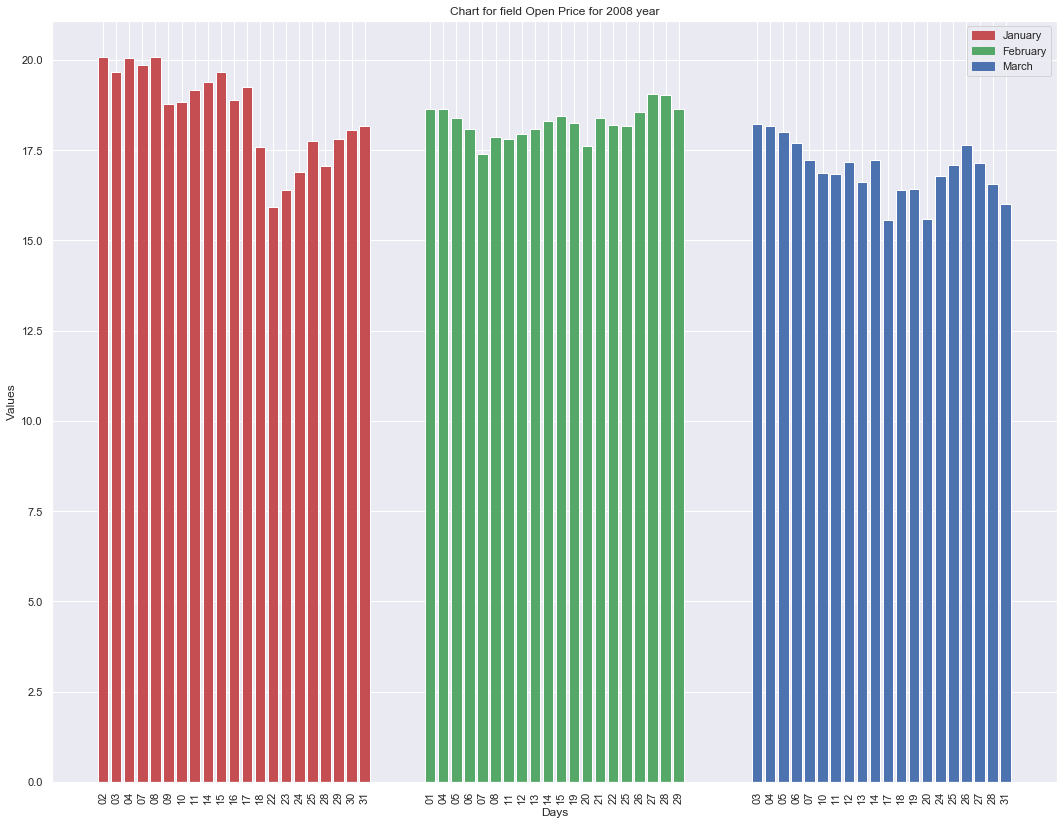

In [77]:
show_chart(df,'Open Price',month=['01','02','03'],figsize=(18,14))